<a href="https://colab.research.google.com/github/victoriousvictor42/banking/blob/master/banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy

In [0]:
# reading the dataset
df = pd.read_csv('http://bit.ly/FinancialDataset')

In [166]:
# checking for the infotmation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [167]:
# checking for columns
df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [168]:
# checking for total number of rows
df.shape[0]

23524

In [169]:
# checking for total number of columns
df.shape[1]

13

In [170]:
# checking the on hoe the top data columns looks like
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [171]:
# checking the bottom of the dataset
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [172]:
#checking for the data types of the dataset, whether they are true
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

Anomalies


In [173]:
# anomalies exist as missing values, duplicates, skewness, outliers. 
# checking for missing values
df.isnull().any().any()

True

In [174]:
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [175]:
#checking for duplicated
df.duplicated().any()

False

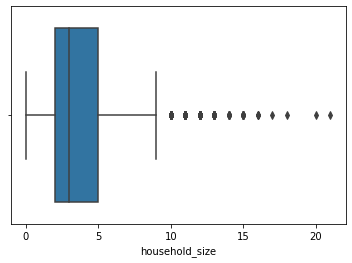

In [181]:
# checking for outliers
sns.boxplot(df['household_size'])
plt.show()

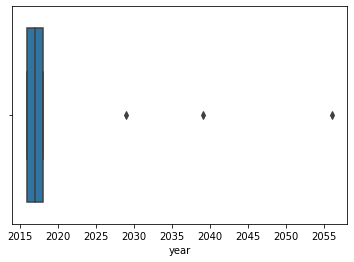

In [180]:
# checking for incorrect data
sns.boxplot(df['year'])
plt.show()

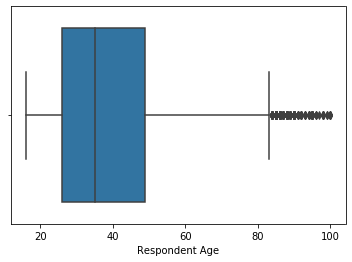

In [179]:
sns.boxplot(df['Respondent Age'])
plt.show()

Dealing with anomalies

In [182]:
# removing outliers
from scipy import stats
z = np.abs(stats.zscore(df['year']))
z

array([1.1348855, 1.1348855, 1.1348855, ..., 1.1348855, 1.1348855,
       1.1348855])

In [183]:
threshold = 3
print(np.where (z>3))

(array([ 213,  308, 7014]),)


In [0]:
df = df[(z<3)]

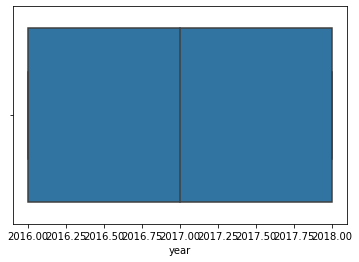

In [185]:
#checking whether outlier has been removed
sns.boxplot(df['year'])
plt.show()

In [0]:
# i removed the outlier in year column only since it looks logical for banks to have client at the age of 80 - 100 
# and also, clients with 10 - 24 households

In [187]:
# we notice that 3 rows have been dropped from the dataset 
df.shape

(23521, 13)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23521 entries, 0 to 23523
Data columns (total 13 columns):
country                   23507 non-null object
year                      23521 non-null int64
uniqueid                  23521 non-null object
Has a Bank account        23485 non-null object
Type of Location          23506 non-null object
Cell Phone Access         23510 non-null object
household_size            23493 non-null float64
Respondent Age            23487 non-null float64
gender_of_respondent      23487 non-null object
The relathip with head    23517 non-null object
marital_status            23489 non-null object
Level of Educuation       23492 non-null object
Type of Job               23491 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [189]:
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [190]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [191]:
# checking for mode in the columns 
df['Has a Bank account'].mode()


0    No
dtype: object

In [192]:
df['gender_of_respondent'].mode()


0    Female
dtype: object

In [193]:
df['Level of Educuation'].mode()


0    Primary education
dtype: object

In [194]:
df['Type of Job'].mode()


0    Self employed
dtype: object

In [195]:
df['marital_status'].mode()


0    Married/Living together
dtype: object

In [196]:
df['The relathip with head'].mode()


0    Head of Household
dtype: object

In [197]:
df['Cell Phone Access'].mode()

0    Yes
dtype: object

In [198]:
df['Type of Location'].mode()

0    Rural
dtype: object

In [0]:
# filling the missing data in the columns using the mode  
df['Has a Bank account'] = df['Has a Bank account'].fillna('No')
df['gender_of_respondent'] = df['gender_of_respondent'].fillna('Female')
df['Level of Educuation'] = df['Level of Educuation'].fillna('Primary education')
df['Type of Job'] = df['Type of Job'].fillna('Self employed')
df['marital_status'] = df['marital_status'].fillna('Married/Living together')
df['The relathip with head'] = df['The relathip with head'].fillna('Head of Household')
df['Cell Phone Access'] = df['Cell Phone Access'].fillna('Yes')
df['Type of Location'] = df['Type of Location'].fillna('Rural')

In [200]:
df.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size             True
Respondent Age             True
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [201]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           0
Cell Phone Access          0
household_size            28
Respondent Age            34
gender_of_respondent       0
The relathip with head     0
marital_status             0
Level of Educuation        0
Type of Job                0
dtype: int64

In [202]:
# finding median of the following columns
df['household_size'].median()

3.0

In [203]:
df['Respondent Age'].median()

35.0

In [0]:
# filling the missing values with the median
df['household_size'] = df['household_size'].fillna('3.0')
df['Respondent Age'] = df['Respondent Age'].fillna('35.0')

In [205]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account         0
Type of Location           0
Cell Phone Access          0
household_size             0
Respondent Age             0
gender_of_respondent       0
The relathip with head     0
marital_status             0
Level of Educuation        0
Type of Job                0
dtype: int64

In [0]:
df=df.dropna()


In [209]:
df.isnull().sum().sum()

0

In [211]:
df.shape

(23507, 13)

**Exploratory analysis**

Univariate analysis

Bivariate analysis

Multivariate analysis